# Load and split data

In [1]:
!pip install tensorflow opencv-python matplotlib

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="n8Y8tTc2NXDdJl1dAHqb")
project = rf.workspace("test-guvlx").project("head-direction-m08xh-ugvgo-xfoue")
version = project.version(1)
dataset = version.download("voc")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Head-Direction-1 in voc:: 100%|██████████| 1181/1181 [00:00<00:00, 2153.50it/s]


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="n8Y8tTc2NXDdJl1dAHqb")
project = rf.workspace("svnmworkspace").project("helmet-detection-afijc-v7gyp")
version = project.version(1)
dataset = version.download("voc")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-detection-1 in voc:: 100%|██████████| 1051/1051 [00:00<00:00, 3068.44it/s]


In [5]:
import os
import cv2
import shutil
import random
import matplotlib.pyplot as plt
import numpy as np

# !pip install tqdm --upgrade
from tqdm.notebook import tqdm

In [6]:
import xml.etree.ElementTree as ET

def parse_voc_xml(xml_file, class_mapping):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    bboxes = []

    # Parse each object in the XML
    for obj in root.findall("object"):
        class_name = obj.find("name").text
        if class_name not in class_mapping:
            continue  # Ignore classes not in mapping

        class_id = class_mapping[class_name]
        bndbox = obj.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)

        bboxes.append({
            'label': class_id,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax
        })

    return bboxes

In [7]:
def visualize_bbox(image, bboxes, c):
    plt.subplot(2,4,c)
    img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    for i, bbox in enumerate(bboxes):
        x_min, y_min, x_max, y_max = bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']
        class_name = bbox['label']

        # Draw the bounding box
        cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)

        # Draw the label
        cv2.putText(img, str(class_name), (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # Display the image
    plt.imshow(img)
    plt.axis("off")

def visualize_keypoints(img_gray, keypoints, labels):
  restored_img_gray_1_color = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

  res = restored_img_gray_1_color.copy()
  cv2.drawKeypoints(restored_img_gray_1_color, keypoints, res, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  plt.imshow(res)
  plt.title(labels)
  plt.show()

In [9]:
head_train_path = "Head-Direction-1/train/"
head_test_path = "Head-Direction-1/test/"
head_val_path = "Head-Direction-1/valid/"
helmet_train_path = "Helmet-detection-1/train/"
helmet_test_path = "Helmet-detection-1/test/"
helmet_val_path = "Helmet-detection-1/valid/"

In [10]:
train_path_img = './data/images/train/'
train_path_label = './data/labels/train/'
test_path_img = './data/images/test/'
test_path_label = './data/labels/test/'
val_path_img = './data/images/val/'
val_path_label = './data/labels/val/'

In [11]:
def train_test_split(path, mode):
  files = list(set([name[:-4] for name in os.listdir(path)]))

  random.seed(42)
  random.shuffle(files)

  os.makedirs(train_path_img, exist_ok = True)
  os.makedirs(train_path_label, exist_ok = True)
  os.makedirs(test_path_img, exist_ok = True)
  os.makedirs(test_path_label, exist_ok = True)
  os.makedirs(val_path_img, exist_ok = True)
  os.makedirs(val_path_label, exist_ok = True)
  p = 0

  if mode=="train":
    for filex in tqdm(files):
      if filex == 'classes':
          continue
      shutil.copy2(path + "/" + filex + '.jpg', f"{train_path_img}/" + filex + '.jpg' )
      shutil.copy2(path + "/" + filex + '.xml', f"{train_path_label}/" + filex + '.xml')

  elif mode=="test":
    for filex in tqdm(files):
        if filex == 'classes':
            continue
        shutil.copy2(path + "/" + filex + '.jpg', f"{test_path_img}/" + filex + '.jpg' )
        shutil.copy2(path + "/" + filex + '.xml', f"{test_path_label}/" + filex + '.xml')

  elif mode=="val":
    for filex in tqdm(files):
        if filex == 'classes':
            continue
        shutil.copy2(path + "/" + filex + '.jpg', f"{val_path_img}/" + filex + '.jpg' )
        shutil.copy2(path + "/" + filex + '.xml', f"{val_path_label}/" + filex + '.xml')

train_test_split(head_train_path,"train")
train_test_split(head_test_path,"test")
train_test_split(head_val_path,"val")
train_test_split(helmet_train_path,"train")
train_test_split(helmet_test_path,"test")
train_test_split(helmet_val_path,"val")

  0%|          | 0/411 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

# Train model untuk classify object based on descriptors

In [ ]:
orb = cv2.ORB_create()
akaze = cv2.AKAZE_create()

In [ ]:
def get_image_and_label(path):
  image_list = []
  label_list = []
  for img in os.listdir(path):
    image = cv2.imread(path+img) # read img
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # change to grayscale
    image = cv2.GaussianBlur(image, (11,11), 0)
    image = cv2.equalizeHist(image)
    label = img[:-4]+'.xml'
    image_list.append(image)
    label_list.append(label)
  return image_list, label_list

train_image_list, train_label_list = get_image_and_label(train_path_img)
test_image_list, test_label_list = get_image_and_label(test_path_img)
val_image_list, val_label_list = get_image_and_label(val_path_img)

print(len(train_image_list), len(test_image_list), len(val_image_list))

760 142 209


In [ ]:
label2id = {"0":0, "helmet":1}
id2label = {0:"head", 1:"helmet"}

In [ ]:
def combine_keypoints(keypoints1, keypoints2, threshold=5):
    combined = list(keypoints1)  # Initialize as a list, not a tuple
    for kp2 in keypoints2:
        if not any(cv2.norm(kp1.pt, kp2.pt) < threshold for kp1 in combined):
            combined.append(kp2)  # Append works on lists
    return combined

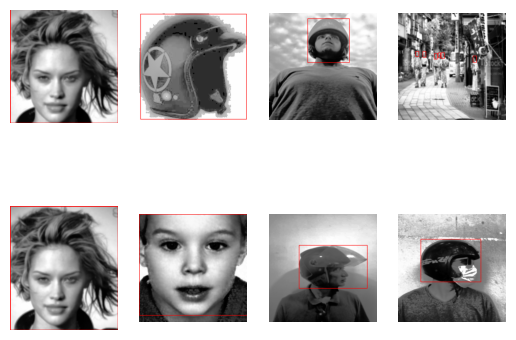

In [ ]:
train_features = []
i=1

for img, label in zip(train_image_list, train_label_list):

  bboxes = parse_voc_xml(train_path_label+label, label2id) # bounding boxes & class of each bounding box

  if i<=8 :
    visualize_bbox(img, bboxes, i) # just visualize the first 8 data
  i+=1

  for bbox in bboxes:
    if bbox['xmin'] > img.shape[1]:continue
    cropped_image = img[bbox['ymin']:bbox['ymax'], bbox['xmin']:bbox['xmax']] # crop
    if cropped_image.shape[0] < 32 or cropped_image.shape[1] < 32:
      cropped_image = cv2.resize(cropped_image, (32, 32))  # Example resizing

    keypoints_orb, descriptors_orb = orb.detectAndCompute(cropped_image, None)
    keypoints_akaze, descriptors_akaze = akaze.detectAndCompute(cropped_image, None)

    combined_keypoints = combine_keypoints(keypoints_orb, keypoints_akaze)

    if not combined_keypoints:
      continue
    if descriptors_orb is None :
      continue
    if descriptors_akaze is None:
      continue

    min_rows = min(descriptors_orb.shape[0], descriptors_akaze.shape[0])
    descriptors_orb = descriptors_orb[:min_rows]
    descriptors_akaze = descriptors_akaze[:min_rows]

    # Concatenate the descriptors
    combined_descriptors = np.hstack((descriptors_orb, descriptors_akaze))

    for kp in combined_keypoints:
      kp.pt = (kp.pt[1] + bbox['xmin'], kp.pt[0] + bbox['ymin'])

    train_features.append((img, combined_keypoints, combined_descriptors, bbox['label']))

plt.tight_layout
plt.show()

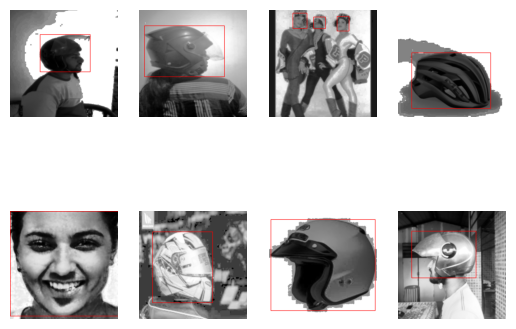

In [ ]:
test_features = []
i=1

for img, label in zip(test_image_list, test_label_list):

  bboxes = parse_voc_xml(test_path_label+label, label2id)

  if i<=8 :
    visualize_bbox(img, bboxes, i) # just visualize the first 8 data
    i+=1

  for bbox in bboxes:
    if bbox['xmin'] > img.shape[1]:continue
    cropped_image = img[bbox['ymin']:bbox['ymax'], bbox['xmin']:bbox['xmax']] # crop
    if cropped_image.shape[0] < 32 or cropped_image.shape[1] < 32:
      cropped_image = cv2.resize(cropped_image, (32, 32))  # Example resizing

    keypoints_orb, descriptors_orb = orb.detectAndCompute(cropped_image, None)
    keypoints_akaze, descriptors_akaze = akaze.detectAndCompute(cropped_image, None)

    combined_keypoints = combine_keypoints(keypoints_orb, keypoints_akaze)

    if not combined_keypoints:
      continue
    if descriptors_orb is None :
      continue
    if descriptors_akaze is None:
      continue

    min_rows = min(descriptors_orb.shape[0], descriptors_akaze.shape[0])
    descriptors_orb = descriptors_orb[:min_rows]
    descriptors_akaze = descriptors_akaze[:min_rows]

    # Concatenate the descriptors
    combined_descriptors = np.hstack((descriptors_orb, descriptors_akaze))

    for kp in combined_keypoints:
      kp.pt = (kp.pt[1] + bbox['xmin'], kp.pt[0] + bbox['ymin'])

    test_features.append((img, combined_keypoints, combined_descriptors, bbox['label']))

plt.tight_layout
plt.show()

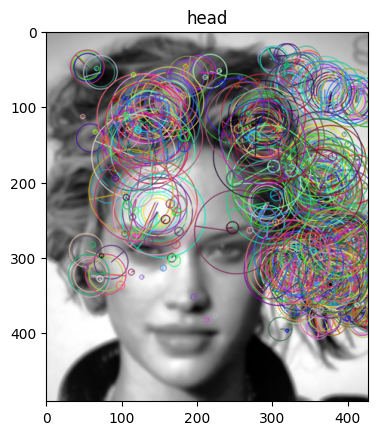

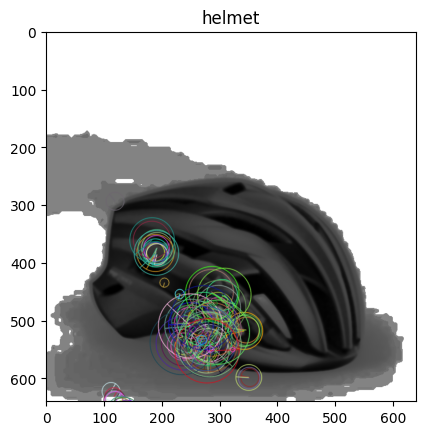

In [ ]:
def draw_keypoints(idx, feature_list, label, extra_label):
  restored_img_gray_1_color = cv2.cvtColor(feature_list[idx][0], cv2.COLOR_GRAY2BGR)

  res = restored_img_gray_1_color.copy()
  cv2.drawKeypoints(restored_img_gray_1_color, feature_list[idx][1], res, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  plt.imshow(res)
  plt.title(id2label[label]+extra_label)

index = 3
draw_keypoints(index, train_features, train_features[index][3],"")
plt.show()
draw_keypoints(index, test_features, test_features[index][3],"")
plt.show()

In [ ]:
desc_length = []
for (img, kp, desc, label) in train_features:
  desc_length.append(desc.shape[0])

print(max(desc_length))
print(min(desc_length))
print(np.sum(desc_length)/len(desc_length))
print(desc_length)

500
1
139.78685897435898
[298, 474, 27, 318, 269, 24, 157, 80, 203, 316, 49, 68, 82, 154, 40, 170, 5, 2, 3, 76, 154, 102, 287, 56, 38, 42, 44, 75, 77, 500, 7, 397, 29, 27, 150, 250, 248, 307, 162, 4, 224, 402, 202, 147, 36, 159, 476, 58, 85, 199, 146, 120, 98, 500, 361, 76, 139, 49, 97, 324, 12, 1, 56, 1, 251, 458, 270, 389, 193, 77, 23, 1, 66, 13, 476, 200, 11, 140, 500, 22, 43, 436, 60, 43, 273, 314, 38, 33, 57, 35, 224, 130, 17, 17, 270, 396, 1, 204, 20, 48, 56, 38, 187, 30, 105, 76, 138, 116, 49, 39, 67, 114, 244, 84, 151, 443, 69, 69, 63, 2, 22, 232, 282, 189, 94, 149, 121, 69, 159, 69, 228, 127, 125, 37, 329, 122, 176, 257, 389, 3, 23, 202, 53, 143, 330, 169, 58, 106, 500, 500, 44, 267, 16, 103, 37, 56, 42, 16, 85, 328, 140, 500, 128, 191, 286, 6, 42, 86, 500, 207, 37, 111, 89, 476, 12, 65, 500, 97, 68, 46, 67, 178, 285, 30, 64, 28, 476, 500, 182, 108, 32, 500, 249, 16, 24, 274, 114, 48, 64, 2, 72, 135, 500, 28, 500, 46, 23, 3, 90, 39, 96, 17, 80, 308, 20, 43, 49, 19, 48, 131, 12

In [ ]:
def pad_or_truncate_descriptors(descriptors, max_descriptors=500):
    if descriptors.shape[0] > max_descriptors:
        return descriptors[:max_descriptors].flatten()
    else:
        padded = np.zeros((max_descriptors, descriptors.shape[1]))
        padded[:descriptors.shape[0]] = descriptors
        return padded.flatten()

padded_train_features = [pad_or_truncate_descriptors(desc, max_descriptors=100) for (img, kp, desc, label) in train_features]
padded_test_features = [pad_or_truncate_descriptors(desc, max_descriptors=100) for (img, kp, desc, label) in test_features]

In [ ]:
padded_train_features = np.array(padded_train_features)  # Convert to NumPy array
padded_test_features = np.array(padded_test_features)  # Convert to NumPy array

train_labels = [col[3] for col in train_features]
train_labels = np.array(train_labels)  # Ensure labels are also a NumPy array
test_labels = [col[3] for col in test_features]
test_labels = np.array(test_labels)  # Ensure labels are also a NumPy array

In [ ]:
from collections import Counter
Counter(train_labels)

Counter({0: 269, 1: 355})

In [ ]:
print(len(train_labels), len(test_labels))

624 118


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest
clf = RandomForestClassifier()
clf.fit(padded_train_features, train_labels)

RandomForestClassifier()

In [ ]:
# Evaluate
probabilities = clf.predict_proba(padded_test_features)

y_pred = clf.predict(padded_test_features)
print("Accuracy:", accuracy_score(test_labels, y_pred))

for i, (predicted_class, prob) in enumerate(zip(y_pred, probabilities)):
    print(f"Sample {i}, Actual class: {id2label[test_labels[i]]}, Predicted class: {id2label[predicted_class]}, Confidence: {max(prob):.2f}")

Accuracy: 0.7966101694915254
Sample 0, Actual class: helmet, Predicted class: helmet, Confidence: 0.82
Sample 1, Actual class: helmet, Predicted class: helmet, Confidence: 0.82
Sample 2, Actual class: head, Predicted class: head, Confidence: 0.78
Sample 3, Actual class: helmet, Predicted class: helmet, Confidence: 0.61
Sample 4, Actual class: head, Predicted class: helmet, Confidence: 0.60
Sample 5, Actual class: helmet, Predicted class: head, Confidence: 0.55
Sample 6, Actual class: helmet, Predicted class: helmet, Confidence: 0.68
Sample 7, Actual class: helmet, Predicted class: helmet, Confidence: 0.53
Sample 8, Actual class: head, Predicted class: head, Confidence: 0.64
Sample 9, Actual class: helmet, Predicted class: helmet, Confidence: 0.62
Sample 10, Actual class: helmet, Predicted class: helmet, Confidence: 0.71
Sample 11, Actual class: helmet, Predicted class: head, Confidence: 0.63
Sample 12, Actual class: helmet, Predicted class: helmet, Confidence: 0.87
Sample 13, Actual cl

Actual label :  helmet
Actual label :  helmet
Actual label :  head
Actual label :  helmet
Actual label :  head


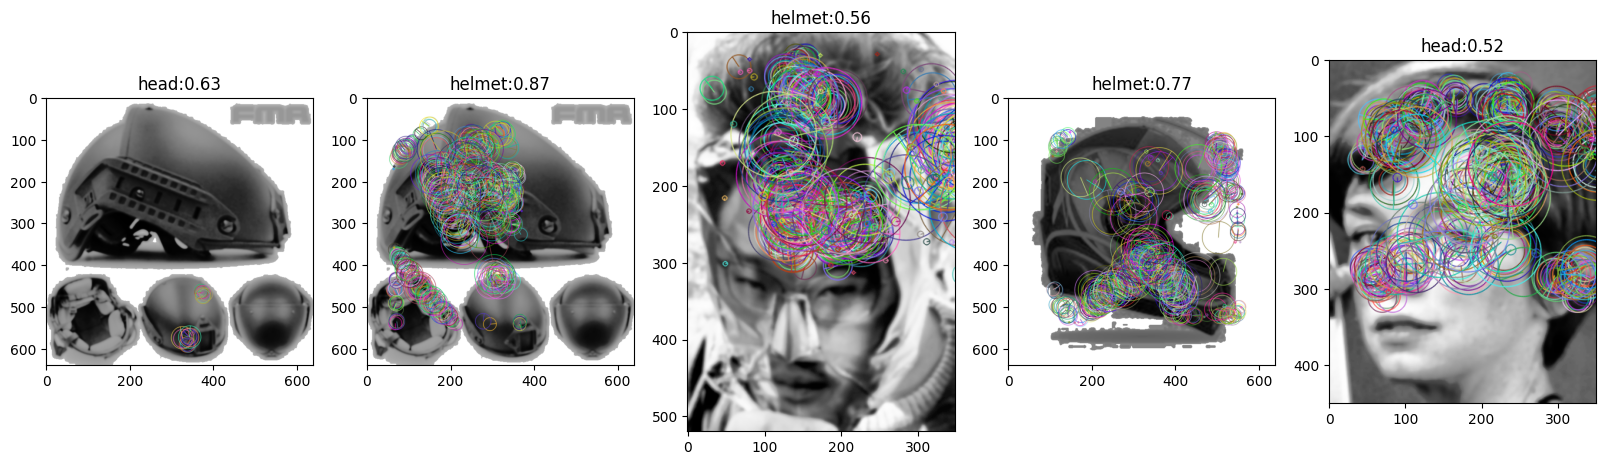

In [ ]:
plt.figure(figsize=(20,20))
for r in range(1,6):
  plt.subplot(1,5,r)
  draw_keypoints(r+10, test_features, y_pred[r+10],":"+str(max(probabilities[r+10])))
  print("Actual label : ",id2label[test_features[r+10][3]])
plt.show()

# Generate bounding boxes for val images using cluster and sliding window

In [ ]:
val_features = []
for img, label in zip(val_image_list, val_label_list):
  bboxes = parse_voc_xml(val_path_label+label, label2id)

  # Detect keypoints and descriptors
  keypoints_orb, descriptors_orb = orb.detectAndCompute(img, None)
  keypoints_akaze, descriptors_akaze = akaze.detectAndCompute(img, None)

  combined_keypoints = combine_keypoints(keypoints_orb, keypoints_akaze)

  min_rows = min(descriptors_orb.shape[0], descriptors_akaze.shape[0])
  descriptors_orb = descriptors_orb[:min_rows]
  descriptors_akaze = descriptors_akaze[:min_rows]

  combined_descriptors = np.hstack((descriptors_orb, descriptors_akaze))

  val_features.append((img, combined_keypoints, combined_descriptors, bboxes))

In [ ]:
from sklearn.cluster import DBSCAN
val_window_sizes = []
for img, keypoints, descriptors, bboxes in val_features:
  # Cluster keypoints
  keypoint_coords = np.array([kp.pt for kp in keypoints])
  clustering = DBSCAN(eps=50, min_samples=3).fit(keypoint_coords)

  # Get unique cluster labels
  labels = clustering.labels_

  total_width = 0
  total_height = 0
  bbox_count = 0
  # Loop through unique clusters
  for label in np.unique(labels):
      if label == -1:  # Ignore noise points
          continue

      cluster_points = keypoint_coords[labels == label]
      # Calculate bounding box
      x_min = np.min(cluster_points[:, 0])
      x_max = np.max(cluster_points[:, 0])
      y_min = np.min(cluster_points[:, 1])
      y_max = np.max(cluster_points[:, 1])

      width = int(x_max)-int(x_min)
      height = int(y_max)-int(y_min)
      total_width += width
      total_height += height
      bbox_count += 1
  avg_width = total_width/bbox_count
  avg_height = total_height/bbox_count
  val_window_sizes.append((img, avg_width, avg_height, bboxes))

In [ ]:
def calculate_iou(box_a, box_p):
    # box_a and box_p are [x_min, y_min, x_max, y_max]

    # Intersection coordinates
    x_min_inter = max(box_a[0], box_p[0])
    y_min_inter = max(box_a[1], box_p[1])
    x_max_inter = min(box_a[2], box_p[2])
    y_max_inter = min(box_a[3], box_p[3])

    # Intersection area
    inter_width = max(0, x_max_inter - x_min_inter)
    inter_height = max(0, y_max_inter - y_min_inter)
    area_inter = inter_width * inter_height

    # Areas of both boxes
    area_a = (box_a[2] - box_a[0]) * (box_a[3] - box_a[1])
    area_p = (box_p[2] - box_p[0]) * (box_p[3] - box_p[1])

    # Union area
    area_union = area_a + area_p - area_inter

    # IoU
    iou = area_inter / area_union if area_union > 0 else 0
    return iou

In [ ]:
windows_data_list = []
final_bboxes = []
total_avg = 0
for k, (img, width, height, bboxes) in enumerate(val_window_sizes):
  i=-1
  window_size = (int(width), int(height))
  step_size = (int(width/2), int(height/2))

  num_of_bbox = len(bboxes)
  max_iou = np.zeros(num_of_bbox, dtype=float)
  max_iou_box_coord = np.zeros((num_of_bbox, 4), dtype=int)

  for y in range(0, img.shape[0] - window_size[1] + 1, step_size[1]):
      for x in range(0, img.shape[1] - window_size[0] + 1, step_size[0]):
          # Extract the window
          window = img[y:y + window_size[1], x:x + window_size[0]]
          i+=1
          cropped_input_orb_keypoints, cropped_input_orb_descriptors = orb.detectAndCompute(window, None)
          cropped_input_akaze_keypoints, cropped_input_akaze_descriptors = akaze.detectAndCompute(window, None)

          combined_keypoints = combine_keypoints(cropped_input_orb_keypoints, cropped_input_akaze_keypoints)

          if not combined_keypoints:
            continue
          if cropped_input_orb_descriptors is None :
            continue
          if cropped_input_akaze_descriptors is None:
            continue

          min_rows = min(cropped_input_orb_descriptors.shape[0], cropped_input_akaze_descriptors.shape[0])
          cropped_input_orb_descriptors = cropped_input_orb_descriptors[:min_rows]
          cropped_input_akaze_descriptors = cropped_input_akaze_descriptors[:min_rows]

          # Concatenate the descriptors
          combined_descriptors = np.hstack((cropped_input_orb_descriptors, cropped_input_akaze_descriptors))

          padded_desc = pad_or_truncate_descriptors(combined_descriptors, max_descriptors=100)
          padded_desc = np.array(padded_desc)

          input_prob = clf.predict_proba(padded_desc.reshape(1,-1))
          max_prob = np.max(input_prob)
          input_y_pred = clf.predict(padded_desc.reshape(1,-1))

          # if max_prob < 0.7:
          #   continue

          predicted_box = [x, y, x+window_size[0], y+window_size[1]]
          for b, bbox in enumerate(bboxes):
            actual_box = [bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']]

            iou = calculate_iou(actual_box, predicted_box)
            if iou > max_iou[b]:
              max_iou[b] = iou
              max_iou_box_coord[b] = predicted_box
  # utk img ini, generated bbox yg paling similar yg mana utk masing" actual bboxnya?
  iou_avg = np.mean(max_iou)
  total_avg += iou_avg
  final_bboxes.append((img, bboxes, max_iou_box_coord, max_iou, input_y_pred))

accuracy = total_avg/len(val_window_sizes)
print(accuracy)

0.226547862356405


[{'label': 0, 'xmin': 1, 'ymin': 1, 'xmax': 225, 'ymax': 225}] [[ 72  68 217 204]] iou : [0.39301658]


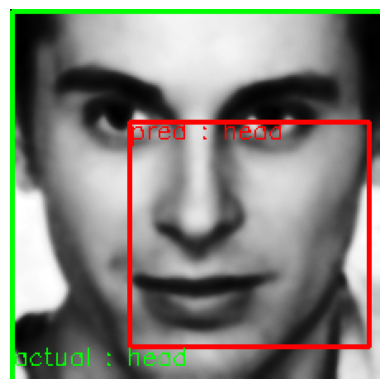

[{'label': 0, 'xmin': 49, 'ymin': 38, 'xmax': 193, 'ymax': 230}] [[0 0 0 0]] iou : [0.]


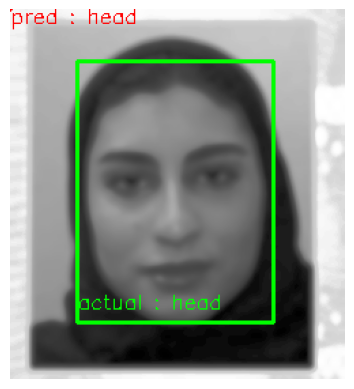

[{'label': 0, 'xmin': 1, 'ymin': 1, 'xmax': 202, 'ymax': 275}] [[  0  85 140 256]] iou : [0.43024708]


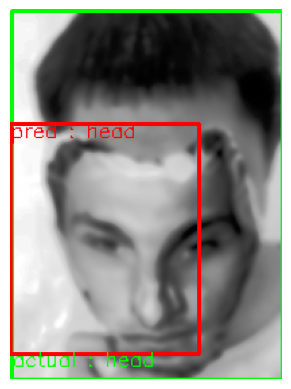

[{'label': 0, 'xmin': 1, 'ymin': 1, 'xmax': 270, 'ymax': 247}] [[  0  76 205 228]] iou : [0.46750897]


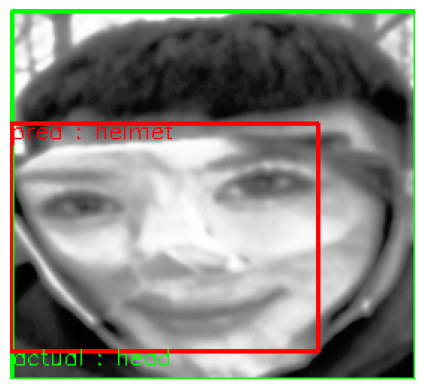

[{'label': 0, 'xmin': 1, 'ymin': 1, 'xmax': 641, 'ymax': 641}] [[364 141 546 235]] iou : [0.04176758]


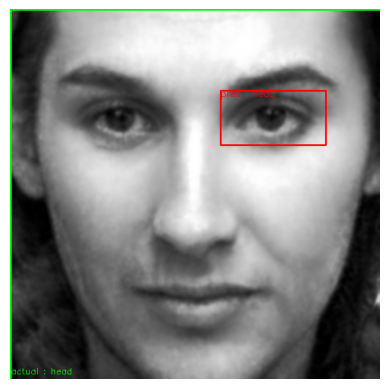

[{'label': 0, 'xmin': 1, 'ymin': 1, 'xmax': 177, 'ymax': 233}] [[ 56  59 169 178]] iou : [0.32932504]


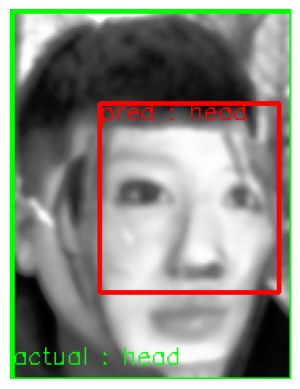

[{'label': 1, 'xmin': 140, 'ymin': 182, 'xmax': 567, 'ymax': 480}] [[145 169 435 507]] iou : [0.6224162]


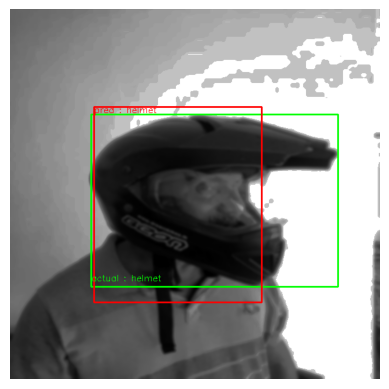

[{'label': 1, 'xmin': 103, 'ymin': 150, 'xmax': 591, 'ymax': 445}] [[  0   0 581 466]] iou : [0.51520665]


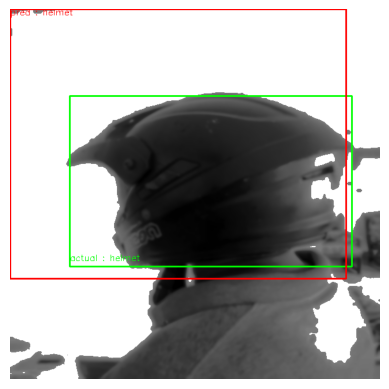

[{'label': 1, 'xmin': 160, 'ymin': 346, 'xmax': 548, 'ymax': 572}] [[219 438 365 585]] iou : [0.21838234]


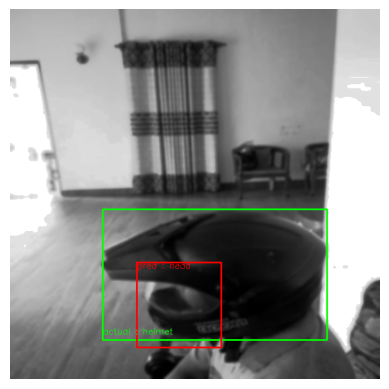

[{'label': 0, 'xmin': 525, 'ymin': 61, 'xmax': 560, 'ymax': 117}, {'label': 0, 'xmin': 595, 'ymin': 169, 'xmax': 614, 'ymax': 214}, {'label': 0, 'xmin': 489, 'ymin': 249, 'xmax': 507, 'ymax': 282}, {'label': 0, 'xmin': 440, 'ymin': 183, 'xmax': 463, 'ymax': 222}, {'label': 0, 'xmin': 389, 'ymin': 193, 'xmax': 411, 'ymax': 236}, {'label': 0, 'xmin': 380, 'ymin': 301, 'xmax': 391, 'ymax': 320}, {'label': 0, 'xmin': 363, 'ymin': 361, 'xmax': 368, 'ymax': 371}, {'label': 0, 'xmin': 318, 'ymin': 219, 'xmax': 338, 'ymax': 258}, {'label': 0, 'xmin': 309, 'ymin': 262, 'xmax': 322, 'ymax': 290}, {'label': 0, 'xmin': 266, 'ymin': 216, 'xmax': 290, 'ymax': 255}, {'label': 0, 'xmin': 252, 'ymin': 302, 'xmax': 261, 'ymax': 320}, {'label': 0, 'xmin': 197, 'ymin': 339, 'xmax': 204, 'ymax': 355}, {'label': 0, 'xmin': 153, 'ymin': 344, 'xmax': 161, 'ymax': 358}, {'label': 0, 'xmin': 139, 'ymin': 336, 'xmax': 146, 'ymax': 350}, {'label': 0, 'xmin': 114, 'ymin': 386, 'xmax': 118, 'ymax': 392}, {'label': 

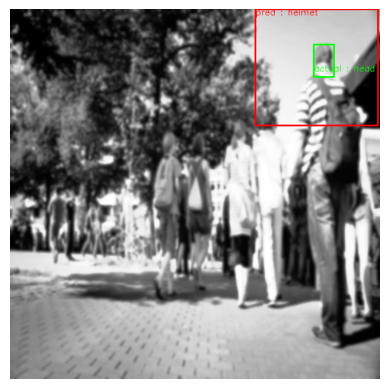

[{'label': 1, 'xmin': 65, 'ymin': 19, 'xmax': 607, 'ymax': 595}] [[324 103 541 310]] iou : [0.14388261]


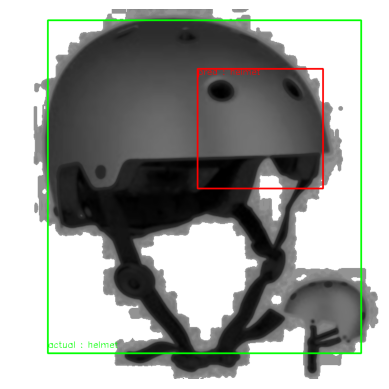

[{'label': 1, 'xmin': 143, 'ymin': 205, 'xmax': 437, 'ymax': 475}] [[133 142 400 427]] iou : [0.57969336]


In [ ]:
def visualize_all_bbox(image, actual_bboxes, generated_bboxes, labels):
    # Ensure grayscale image is converted to RGB for visualization
    img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    for bbox, gbox, label in zip(actual_bboxes, generated_bboxes, labels):
        actual_label, x_min, y_min, x_max, y_max = bbox['label'], bbox['xmin'], bbox['ymin'], bbox['xmax'], bbox['ymax']
        x_min_g, y_min_g, x_max_g, y_max_g = gbox
        # Draw the bounding box
        cv2.rectangle(img, (x_min,y_min), (x_max, y_max), (0, 255, 0), 2) #actual -> green
        cv2.rectangle(img, (x_min_g,y_min_g), (x_max_g, y_max_g), (255, 0, 0), 2) # generated -> red

        # Draw the label
        cv2.putText(img, "actual : "+str(id2label[actual_label]), (x_min, y_max - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        cv2.putText(img, "pred : "+str(id2label[label]), (x_min_g, y_min_g + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the image
    plt.imshow(img)
    plt.axis("off")

for i, (img, bboxes, max_iou_box_coord, max_iou, pred) in enumerate(final_bboxes):
  print(bboxes, max_iou_box_coord, "iou : "+str(max_iou))
  if(i<=10):
    visualize_all_bbox(img, bboxes, max_iou_box_coord, pred)
    plt.show()
  else : break

# New Image

Text(0.5, 1.0, 'Input Image')

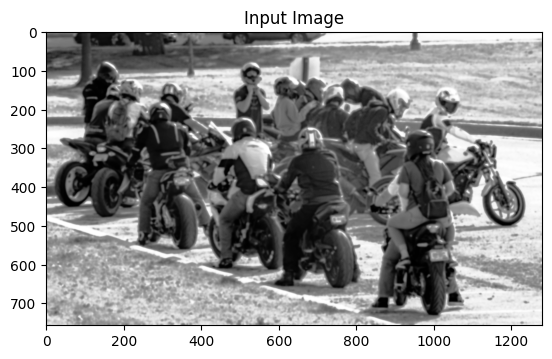

In [ ]:
# Load Input Image
input_image = cv2.imread("helmet.jpg")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
input_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image = cv2.GaussianBlur(input_image, (11,11), 0)
input_image = cv2.equalizeHist(input_image)

plt.imshow(input_image, cmap='gray')
plt.title('Input Image')

## Clustering

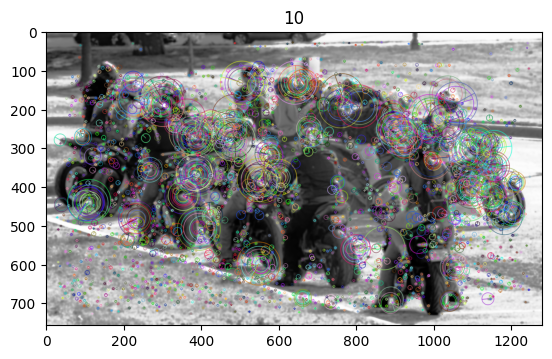

In [ ]:
# Detect keypoints and descriptors
keypoints_orb, descriptors_orb = orb.detectAndCompute(input_image, None)
keypoints_akaze, descriptors_akaze = akaze.detectAndCompute(input_image, None)

combined_keypoints = combine_keypoints(keypoints_orb, keypoints_akaze)

min_rows = min(descriptors_orb.shape[0], descriptors_akaze.shape[0])
descriptors_orb = descriptors_orb[:min_rows]
descriptors_akaze = descriptors_akaze[:min_rows]

# Concatenate the descriptors
combined_descriptors = np.hstack((descriptors_orb, descriptors_akaze))

restored_img_gray_color = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)

res = restored_img_gray_color.copy()
cv2.drawKeypoints(restored_img_gray_color, combined_keypoints, res, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(res)
plt.title(label)
plt.show()

In [ ]:
# Cluster keypoints
from sklearn.cluster import DBSCAN
keypoint_coords = np.array([kp.pt for kp in combined_keypoints])
clustering = DBSCAN(eps=50, min_samples=3).fit(keypoint_coords)

# Get unique cluster labels
labels = clustering.labels_

# Initialize list for bounding boxes
input_image_bounding_boxes = []

# Loop through unique clusters
total_height = 0
total_width = 0
c=0
for label in np.unique(labels):
    if label == -1:  # Ignore noise points
        continue

    cluster_points = keypoint_coords[labels == label]
    # Calculate bounding box
    x_min = np.min(cluster_points[:, 0])
    x_max = np.max(cluster_points[:, 0])
    y_min = np.min(cluster_points[:, 1])
    y_max = np.max(cluster_points[:, 1])
    c+=1

    width = int(x_max)-int(x_min)
    height = int(y_max)-int(y_min)
    total_height += height
    total_width += width

    input_image_bounding_boxes.append((int(x_min), int(y_min), int(x_max), int(y_max)))

avg_width = int(total_width/c)
avg_height = int(total_height/c)

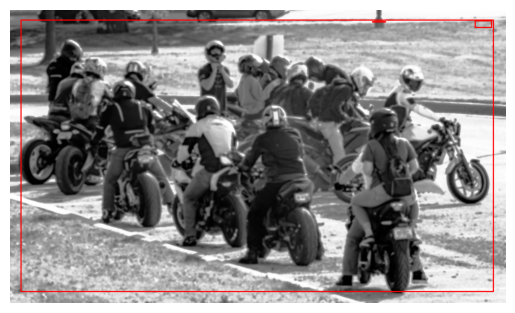

In [ ]:
output_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
for bbox in input_image_bounding_boxes:
    x_min, y_min, x_max, y_max = bbox
    cv2.rectangle(output_image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    # Display the image
plt.imshow(output_image)
plt.axis("off")
plt.show()

In [ ]:
# classify object in each bounding boxes
cropped_input_sift_descriptors_list = []
for bbox in input_image_bounding_boxes:
    x_min, y_min, x_max, y_max = bbox
    cropped_input_image = input_image[y_min:y_max, x_min:x_max]
    cropped_input_orb_keypoints, cropped_input_orb_descriptors = orb.detectAndCompute(input_image, None)
    cropped_input_akaze_keypoints, cropped_input_akaze_descriptors = akaze.detectAndCompute(input_image, None)

    combined_keypoints = combine_keypoints(cropped_input_orb_keypoints, cropped_input_akaze_keypoints)
    if not combined_keypoints:
      continue
    if cropped_input_orb_descriptors is None :
      continue
    if cropped_input_akaze_descriptors is None:
      continue

    min_rows = min(cropped_input_orb_descriptors.shape[0], cropped_input_akaze_descriptors.shape[0])
    cropped_input_orb_descriptors = cropped_input_orb_descriptors[:min_rows]
    cropped_input_akaze_descriptors = cropped_input_akaze_descriptors[:min_rows]

    # Concatenate the descriptors
    combined_descriptors = np.hstack((cropped_input_orb_descriptors, cropped_input_akaze_descriptors))

    cropped_input_sift_descriptors_list.append(combined_descriptors)

padded_input_sift_descriptors_list = [pad_or_truncate_descriptors(desc, max_descriptors=100) for desc in cropped_input_sift_descriptors_list]
padded_input_sift_descriptors_list = np.array(padded_input_sift_descriptors_list)

# Evaluate
input_probabilities = clf.predict_proba(padded_input_sift_descriptors_list)
input_y_pred = clf.predict(padded_input_sift_descriptors_list)

used_bboxes = []
for i, (predicted_class, prob) in enumerate(zip(input_y_pred, input_probabilities)):
  print(f"Bbox {i}, Predicted class: {predicted_class}, Confidence: {max(prob):.2f}")
  if(max(prob)>0.6):
    used_bboxes.append((input_image_bounding_boxes[i], predicted_class))

Bbox 0, Predicted class: 1, Confidence: 0.71
Bbox 1, Predicted class: 1, Confidence: 0.71
Bbox 2, Predicted class: 1, Confidence: 0.71


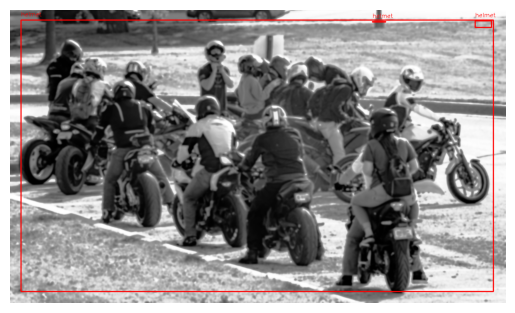

In [ ]:
def visualize_pred(image, bboxes):
    # Ensure grayscale image is converted to RGB for visualization
    img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    for i, (bbox, label) in enumerate(bboxes):
        x_min, y_min, x_max, y_max = bbox
        # class_name = bbox['label']

        # Draw the bounding box
        cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)

        # Draw the label
        cv2.putText(img, str(id2label[label]), (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the image
    plt.imshow(img)
    plt.axis("off")

visualize_pred(input_image, used_bboxes)
plt.show()

## Sliding window

[]

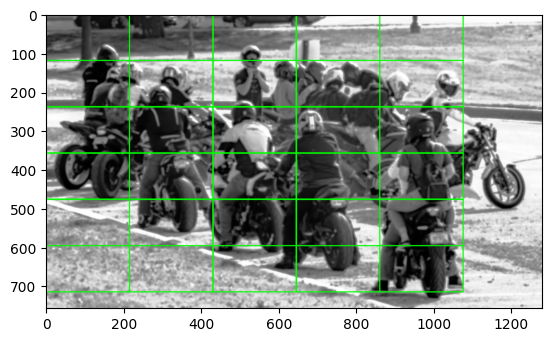

In [ ]:
all_windows = []
window_size = (avg_width, avg_height)  # Window width and height
step_size = (int(avg_width/2), int(avg_height/2))  # Step size for x and y
for y in range(0, input_image.shape[0] - window_size[1] + 1, step_size[1]):
    for x in range(0, input_image.shape[1] - window_size[0] + 1, step_size[0]):
        # Extract the window
        window = input_image[y:y + window_size[1], x:x + window_size[0]]
        all_windows.append((x, y, window))

clone = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)

# extract features from each windows
windows_descriptors_list = []
windows_idx_list = []
for i, (x, y, window) in enumerate(all_windows):
    cropped_input_orb_keypoints, cropped_input_orb_descriptors = orb.detectAndCompute(window, None)
    cropped_input_akaze_keypoints, cropped_input_akaze_descriptors = akaze.detectAndCompute(window, None)

    combined_keypoints = combine_keypoints(cropped_input_orb_keypoints, cropped_input_akaze_keypoints)
    if not combined_keypoints:
      continue
    if cropped_input_orb_descriptors is None :
      continue
    if cropped_input_akaze_descriptors is None:
      continue

    min_rows = min(cropped_input_orb_descriptors.shape[0], cropped_input_akaze_descriptors.shape[0])
    cropped_input_orb_descriptors = cropped_input_orb_descriptors[:min_rows]
    cropped_input_akaze_descriptors = cropped_input_akaze_descriptors[:min_rows]

    # Concatenate the descriptors
    combined_descriptors = np.hstack((cropped_input_orb_descriptors, cropped_input_akaze_descriptors))

    windows_idx_list.append(i)
    windows_descriptors_list.append(combined_descriptors)

    # Display the window
    cv2.rectangle(clone, (x, y), (x + window_size[0], y + window_size[1]), (0, 255, 0), 2)
plt.imshow(clone)
plt.plot()

In [ ]:
padded_input_windows_descriptors_list = [pad_or_truncate_descriptors(desc, max_descriptors=100) for desc in windows_descriptors_list]
padded_input_windows_descriptors_list = np.array(padded_input_windows_descriptors_list)

# Evaluate
input_probabilities = clf.predict_proba(padded_input_windows_descriptors_list)
input_y_pred = clf.predict(padded_input_windows_descriptors_list)

used_windows = []
for i, (predicted_class, prob) in enumerate(zip(input_y_pred, input_probabilities)):
  print(f"Window {windows_idx_list[i]}, Predicted class: {predicted_class}, Confidence: {max(prob):.2f}")
  if(max(prob)>0.7):
    used_windows.append((windows_idx_list[i], predicted_class))

Window 0, Predicted class: 1, Confidence: 0.57
Window 1, Predicted class: 1, Confidence: 0.55
Window 2, Predicted class: 1, Confidence: 0.63
Window 3, Predicted class: 1, Confidence: 0.65
Window 4, Predicted class: 1, Confidence: 0.64
Window 5, Predicted class: 1, Confidence: 0.71
Window 6, Predicted class: 1, Confidence: 0.60
Window 7, Predicted class: 1, Confidence: 0.68
Window 8, Predicted class: 1, Confidence: 0.70
Window 9, Predicted class: 1, Confidence: 0.62
Window 10, Predicted class: 1, Confidence: 0.65
Window 11, Predicted class: 1, Confidence: 0.51
Window 12, Predicted class: 1, Confidence: 0.51
Window 13, Predicted class: 0, Confidence: 0.52
Window 14, Predicted class: 1, Confidence: 0.66
Window 15, Predicted class: 0, Confidence: 0.56
Window 16, Predicted class: 1, Confidence: 0.53
Window 17, Predicted class: 1, Confidence: 0.55
Window 18, Predicted class: 1, Confidence: 0.62
Window 19, Predicted class: 1, Confidence: 0.62


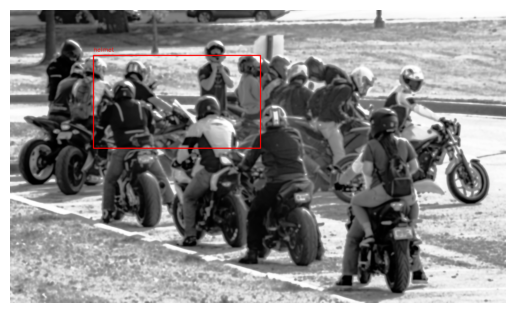

In [ ]:
def visualize_window_pred(image, used_windows):
    # Ensure grayscale image is converted to RGB for visualization
    img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    for (i, label) in (used_windows):
        x,y,window = all_windows[i]
        # Draw the bounding box
        cv2.rectangle(img, (x,y), (x + window_size[0], y + window_size[1]), (255, 0, 0), 2)

        # Draw the label
        cv2.putText(img, str(id2label[label]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the image
    plt.imshow(img)
    plt.axis("off")

visualize_window_pred(input_image, used_windows)
plt.show()